### **Introduction:**

Generally, loan prediction involves the lender looking at various background information about the applicant and deciding whether the bank should grant the loan. Parameters like credit score, loan amount, lifestyle, career, and assets are the deciding factors in getting the loan approved.

###**Problem Statement:**

In this work, we use a machine learning technique that will predict the person who is reliable for a loan, based on the previous record of the person whom the loan amount is accredited before. This work's primary objective is to predict whether the loan approval to a specific individual is safe or not.

The company seeks to automate (in real time) the loan qualifying procedure based on information given by customers while filling out an online application form. It is expected that the development of ML models that can help the company predict loan approval in accelerating decision-making process for determining whether an applicant is eligible for a loan or not.photo-1553729459-efe14ef6055d.avif

**The Tools and Technologies that i have used in this project:**

**Code Editor : Google Colab**

**Data set :   LoanPrediction**

**Source of the Data set : Kaggle**

**Libraries used :**

- Pandads

- Matplotlib

- Seaborn

- Missingno

- Sklearn

### **Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import warnings
import missingno as msno
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from scipy import stats
from scipy.stats import ttest_ind
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

### **Upload the file**

In [ ]:
df_loan= pd.read_csv("/content/loan_data_set.csv")

In [ ]:
df_loan.head()    # by default it displays top/first 5 records

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df_loan.tail()    # by default it displays bottom/last 5 records

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [ ]:
df_loan.shape    # Display no.of rows/records and columns/features  in the data

(614, 13)

In [ ]:
df_loan.columns  # displays all features

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 207 entries, 0 to 612
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Dependents               207 non-null    int64  
 1   ApplicantIncome          207 non-null    float64
 2   CoapplicantIncome        207 non-null    float64
 3   LoanAmount               207 non-null    float64
 4   Loan_Amount_Term         207 non-null    float64
 5   Credit_History           207 non-null    int64  
 6   Gender                   207 non-null    uint8  
 7   Married                  207 non-null    uint8  
 8   Education                207 non-null    uint8  
 9   Self_Employed            207 non-null    uint8  
 10  Property_Area_Rural      207 non-null    uint8  
 11  Property_Area_Semiurban  207 non-null    uint8  
 12  Property_Area_Urban      207 non-null    uint8  
 13  Loan_Status              207 non-null    uint8  
dtypes: float64(4), int64(2), u

**Observations**:  Here some of the columns have null values. so we have to fill those null values with proper values.

### **Data Description**

-  Loan_ID         : Loan reference number
(unique ID)
- Gender           :Applicant gender
(Male or Female)
- Married          :Applicant marital status
(Married or not married)
- Dependents       :Number of family members
- Education        :Applicant education/qualification
(graduate or not graduate)
- Self_Employed    : Applicant employment status
(yes for self-employed, no for employed/others)
- ApplicantIncome   :Applicant's monthly salary/income
- CoapplicantIncome : Additional applicant's monthly salary/income
- LoanAmount        : Loan amount
- Loan_Amount_Term  : The loan's repayment period (in days)
- Credit_History    : 	Records of previous credit history
(0: bad credit history, 1: good credit history)
- Property_Area     : The location of property
(Rural/Semiurban/Urban)
- Loan_Status       : Status of loan
(Y: accepted, N: not accepted)


#### **Show the missing values in graph**

<Axes: >

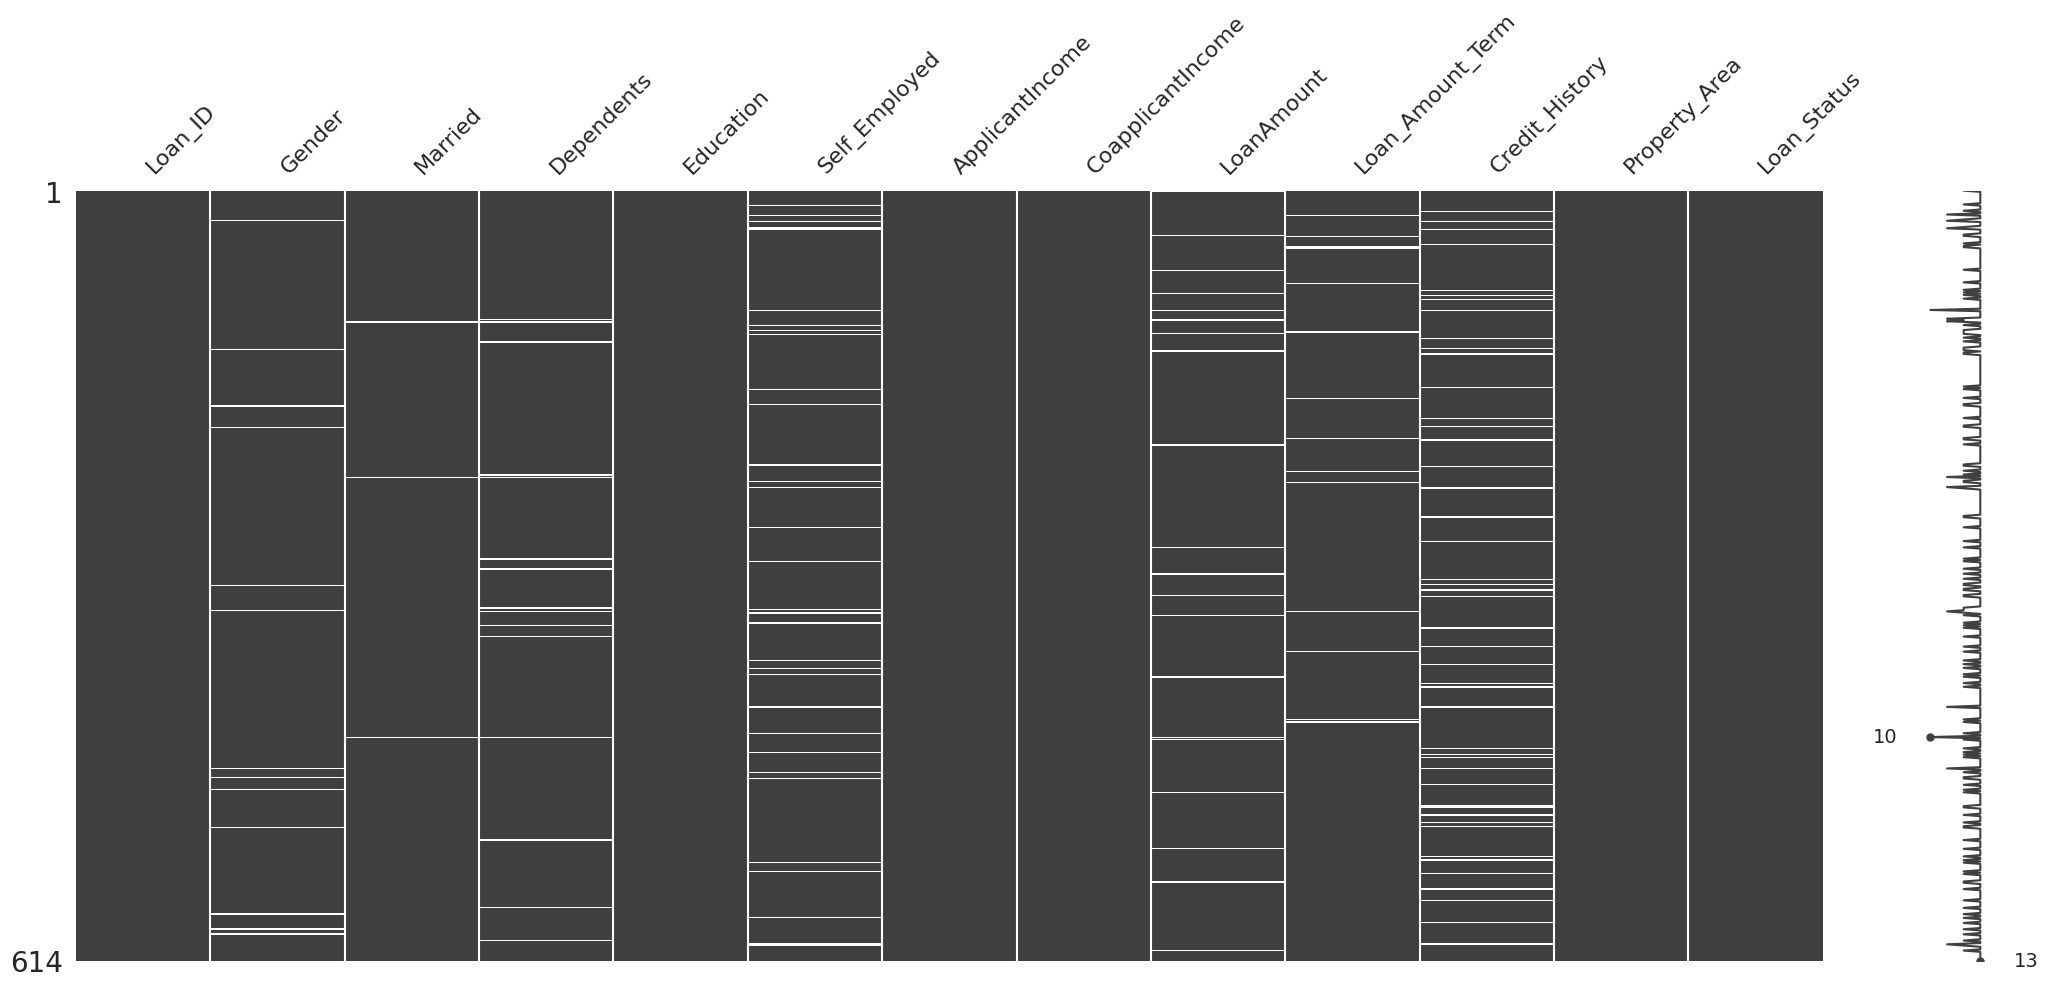

In [ ]:
msno.matrix(df_loan)

### **Cleaning the Data**
1)Finding and Removing duplicated Rows in a DataFrame.

2)Finding missing elements in a DataFrame.

3)Filling the missing values in a DataFrame.

4)Converting columns into appropriate Datatypes.

5)Dropping columns in a DataFrame.

6)Renaming Columns of a DataFrame.

7)Changing the index of a DataFrame.

In [ ]:
# 1)Finding and Removing duplicated Rows in a DataFrame.
df_loan[df_loan.duplicated()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


**2)Finding missing elements in a DataFrame.**    

**3)Filling the missing values in a DataFrame.**

In [ ]:
# Check the null values in Gender column
df_loan.Gender.isnull().sum()

13

In [ ]:
df_loan.Gender.value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

**Observations:**   From the results above, the number of male applicants is higher compared to female applicants. It also can be seen there are missing values in this column.

In [ ]:
df_loan.Gender.mode()[0]

'Male'

In [ ]:
df_loan['Gender'].fillna(df_loan['Gender'].mode()[0],inplace=True)   # fill the null values with mode of value as 'male'

In [ ]:
df_loan.Gender.isnull().sum()

0

In [ ]:
# Check the null values in Married column
df_loan.Married.isnull().sum()

3

In [ ]:
 df_loan.Married.value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [ ]:
df_loan['Married'] = df_loan['Married'].fillna('Yes')  # fill the null values with 'yes'

In [ ]:
df_loan.Married.isnull().sum()

0

In [ ]:
# Check the null values in Dependents column
df_loan.Dependents.isnull().sum()

15

In [ ]:
df_loan.Dependents.value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [ ]:
df_loan['Dependents'].replace('3+',3,inplace=True)

In [ ]:
df_loan.Dependents.value_counts()

0    345
1    102
2    101
3     51
Name: Dependents, dtype: int64

In [ ]:
df_loan['Dependents'] = df_loan['Dependents'].fillna(0)  # fill the null values with mode

In [ ]:
df_loan.Dependents.isnull().sum()

0

In [ ]:
# Check the null values in Self_Employed column
df_loan.Self_Employed.isnull().sum()

32

In [ ]:
df_loan.Self_Employed.value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [ ]:
df_loan['Self_Employed'] = df_loan['Self_Employed'].fillna('No')   # fill the null values with mode

In [ ]:
df_loan.Self_Employed.isnull().sum()

0

In [ ]:
# Check the null values in LoanAmount  column
df_loan.LoanAmount.isnull().sum()

22

In [ ]:
df_loan.LoanAmount.median()   # find out the median value of loan

128.0

In [ ]:
df_loan['LoanAmount'].fillna(df_loan['LoanAmount'].median(),inplace=True)  # Fill the null values with median

In [ ]:
df_loan.LoanAmount.isnull().sum()

0

In [ ]:
# Check the null values in Loan_Amount_Term  column
df_loan.Loan_Amount_Term.isnull().sum()

14

In [ ]:
df_loan.Loan_Amount_Term.median()  # find out the median value of Loan_Amount_Term

360.0

In [ ]:
df_loan['Loan_Amount_Term'].fillna(df_loan['Loan_Amount_Term'].median(),inplace=True)

In [ ]:
df_loan.LoanAmount.isnull().sum()

0

In [ ]:
# Check the null values in Credit_History column
df_loan.Credit_History.isnull().sum()

50

In [ ]:
df_loan['Credit_History']= np.where(df_loan['Credit_History'].isna(),df_loan['Credit_History'].median(skipna=True),df_loan['Credit_History'])

In [ ]:
df_loan.Credit_History.isnull().sum()

0

**Show the missing values in graph**

<Axes: >

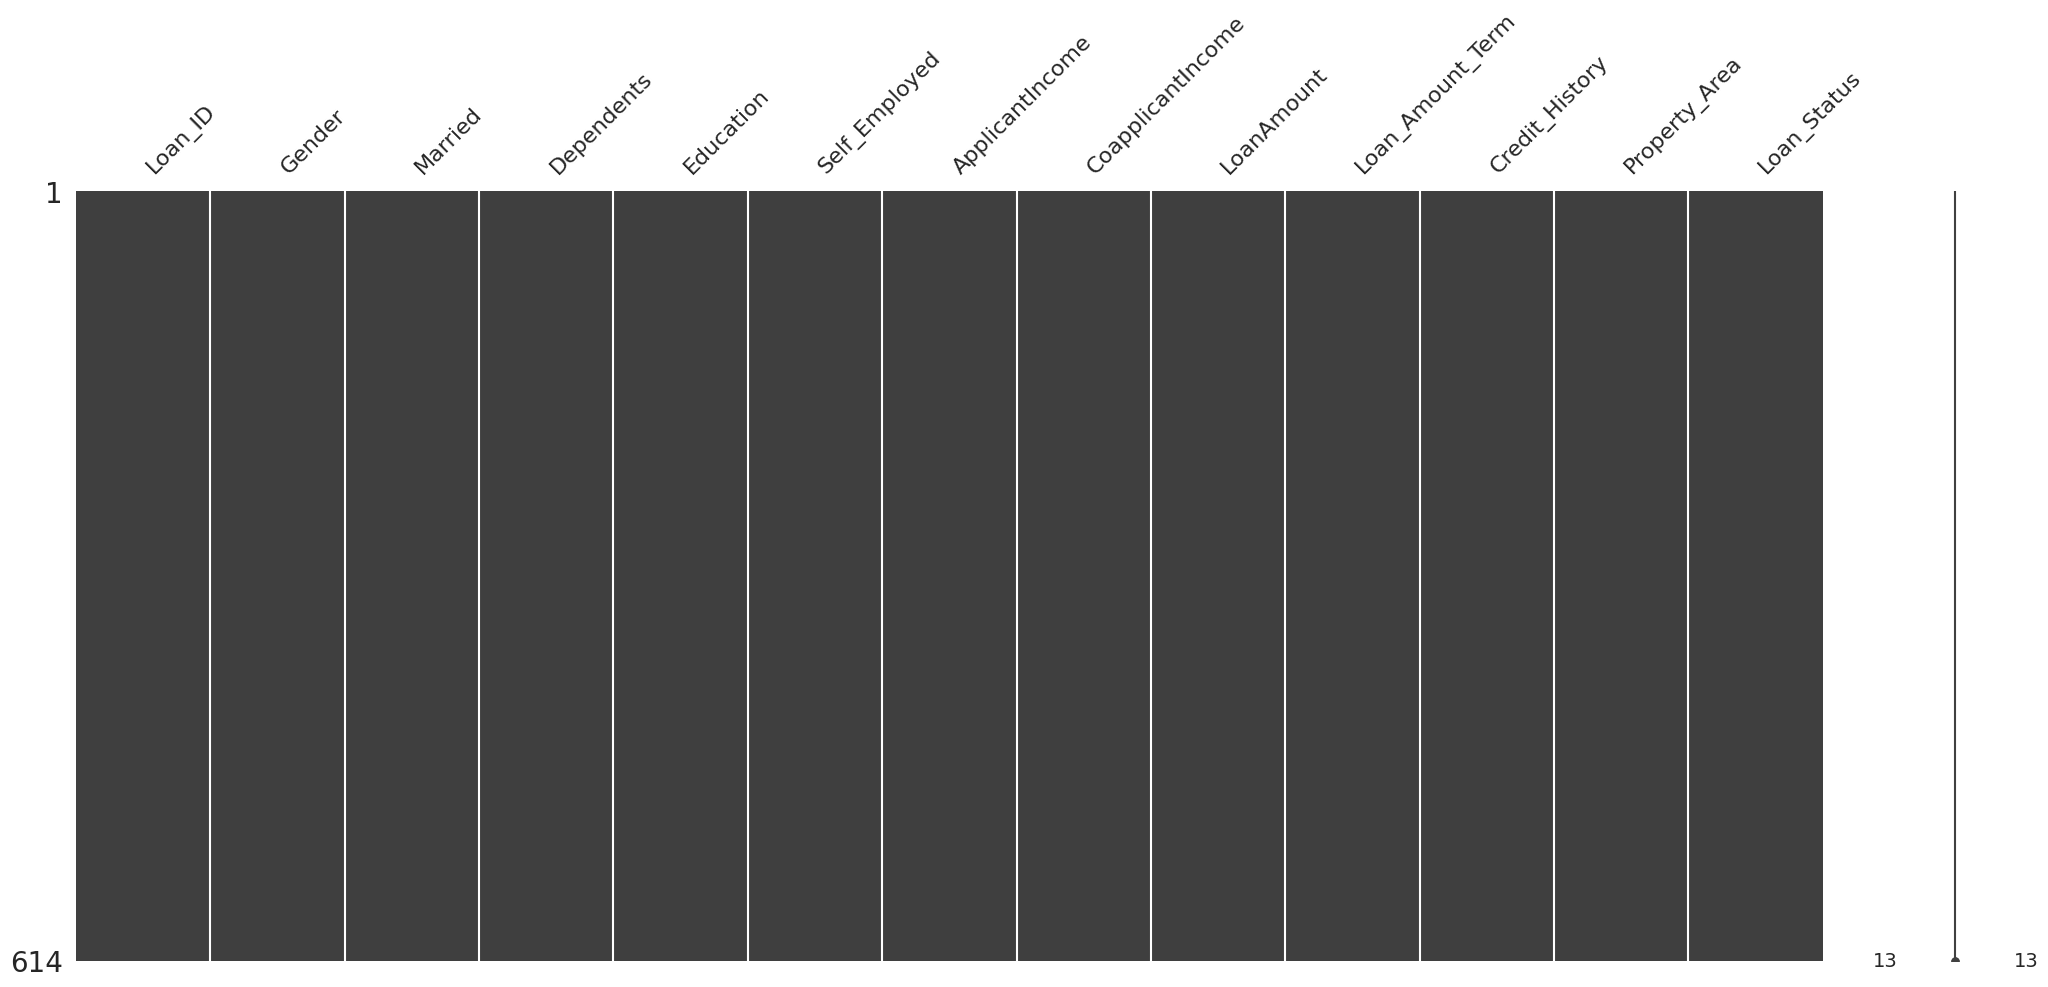

In [ ]:
msno.matrix(df_loan)

**4)Converting columns into appropriate Datatypes.**

In [ ]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
df_loan['Dependents'] = df_loan['Dependents'].astype('int')
df_loan['Credit_History'] = df_loan['Credit_History'].astype('int')

In [ ]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    int64  
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    int64  
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(3), int64(3), object(7)
memory usage: 62.5+ KB


**5)Dropping columns in a DataFrame.**

In [ ]:
# Dropping the column  'Loan_ID'
df_loan.drop(['Loan_ID'],inplace=True,axis=1)

In [ ]:
df_loan.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

#### **Show the corr,skewness of all features**

In [ ]:
df_loan[['ApplicantIncome','CoapplicantIncome','LoanAmount']].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount
count,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443
std,6109.041673,2926.248369,84.107233
min,150.000000,0.000000,9.000000
25%,2877.500000,0.000000,100.250000
50%,3812.500000,1188.500000,128.000000
75%,5795.000000,2297.250000,164.750000
max,81000.000000,41667.000000,700.000000


In [ ]:
df_loan[['ApplicantIncome','CoapplicantIncome','LoanAmount']].corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount
ApplicantIncome,1.000000,-0.116605,0.565181
CoapplicantIncome,-0.116605,1.000000,0.189218
LoanAmount,0.565181,0.189218,1.000000


In [ ]:
df_loan[['ApplicantIncome','CoapplicantIncome','LoanAmount']].skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.743053
dtype: float64

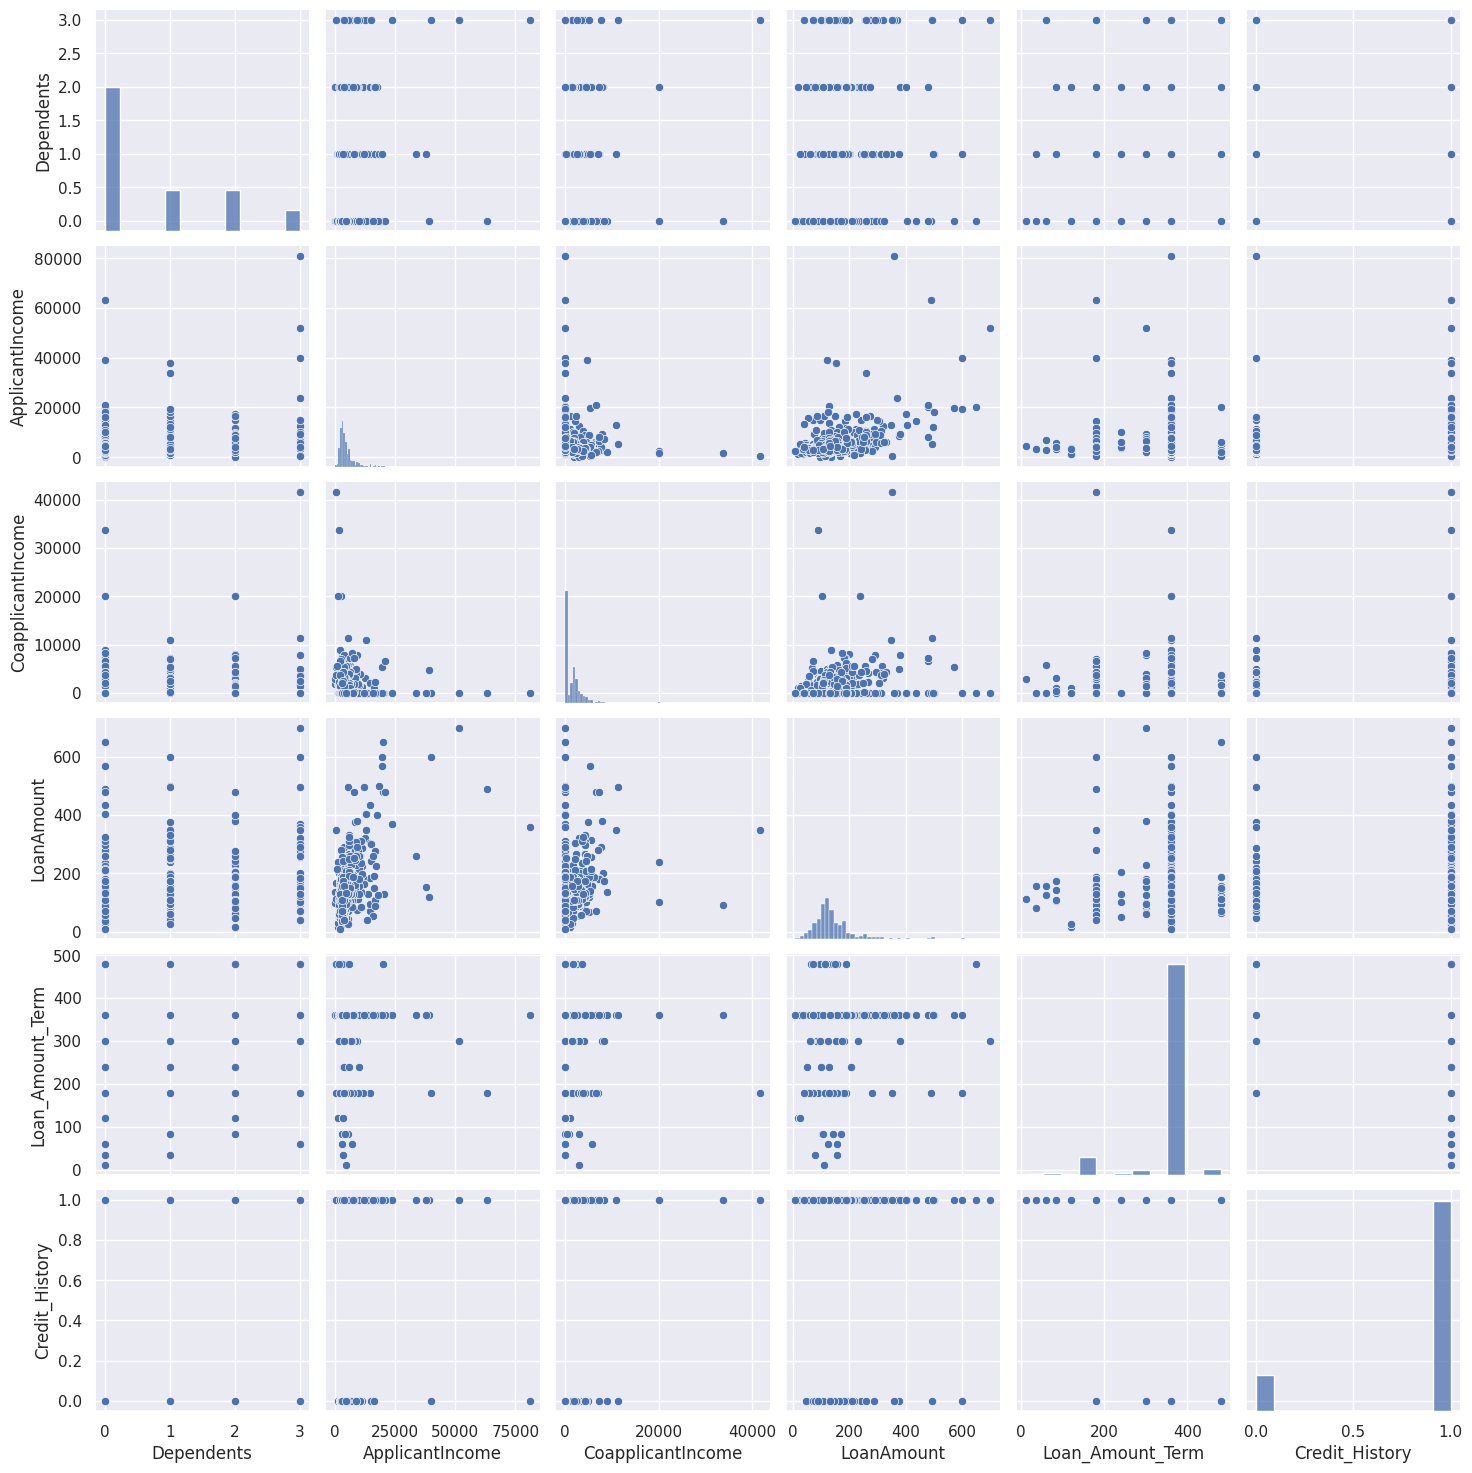

In [ ]:
sns.pairplot(df_loan)

<ipython-input-205-dc0aba3c44e1>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

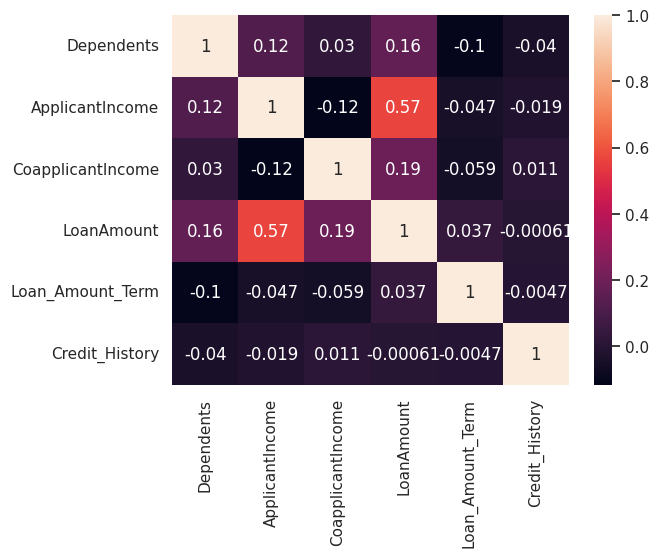

In [ ]:
sns.heatmap(df_loan.corr(),annot=True)

**Observattions:** There is positive correlation between Loan Amount and Applicant Income

###  **EDA Exploratory data analysisis**

an approach of analyzing data sets to summarize their main characteristics, often using statistical graphics and other data visualization methods.

### **Univariate Analysis**

#### **Now work with 'Gender'**

In [ ]:
df_loan.Gender.value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

<ipython-input-207-c6b819419013>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




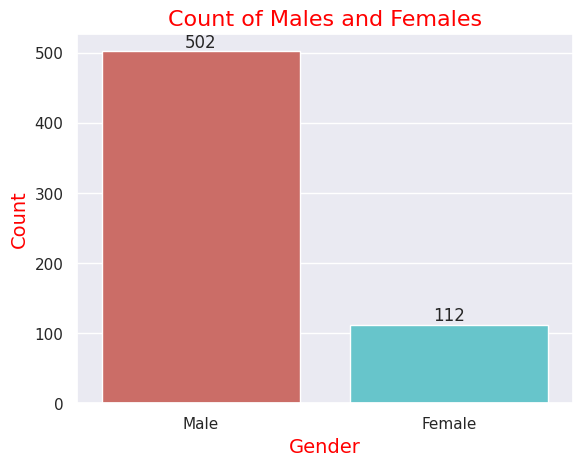

In [ ]:
# Count plot for Gender using sns
ax=sns.countplot(x='Gender',data=df_loan,palette="hls")
for container in ax.containers:
        ax.bar_label(container)
plt.xlabel('Gender',size=14,color='red')
plt.ylabel('Count',size=14,color='red')
plt.title('Count of Males and Females',size=16,color='red')
plt.show()

**Observations**:  The number of male applicants is higher compared to female applicants.

In [ ]:
# Draw the pie plot for Gender using Plotlyexpress
fig = px.pie(df_loan, values=df_loan.Gender.value_counts(), names=list(df_loan.Gender.value_counts().index))
fig.show()

**Observations:**  81.8% were male applicants.

#### **Now work with 'Married'**

In [ ]:
df_loan.Married.value_counts()

Yes    401
No     213
Name: Married, dtype: int64

<ipython-input-210-15507f2ecd85>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




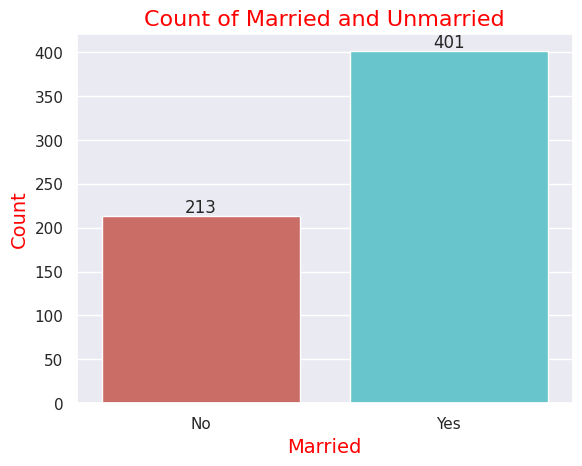

In [ ]:
# Count plot for Married using sns
ax=sns.countplot(x='Married',data=df_loan,palette="hls")
for container in ax.containers:
        ax.bar_label(container)
plt.xlabel('Married',size=14,color='red')
plt.ylabel('Count',size=14,color='red')
plt.title('Count of Married and Unmarried',size=16,color='red')
plt.show()

**Observations:** The number of applicants that has been married is higher compared to applicants that hasn't married.

#### **Now work with Dependents**

In [ ]:
df_loan.Dependents.value_counts()

0    360
1    102
2    101
3     51
Name: Dependents, dtype: int64

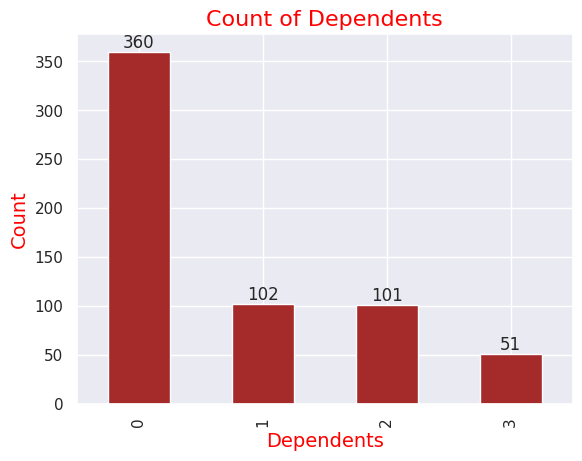

In [ ]:
# Drawn a bar graph for Dependents
ax= df_loan.Dependents.value_counts().plot.bar(color='brown')
ax.bar_label(ax.containers[0],label_type='edge')
plt.xlabel('Dependents',size=14,color='red')
plt.ylabel('Count',size=14,color='red')
plt.title('Count of Dependents',size=16,color='red')
plt.show()

**Observations:** Here most of the applicants were not dependents.

#### **Now work with Education**

In [ ]:
df_loan.Education.value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

<ipython-input-214-3f827cde3db5>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




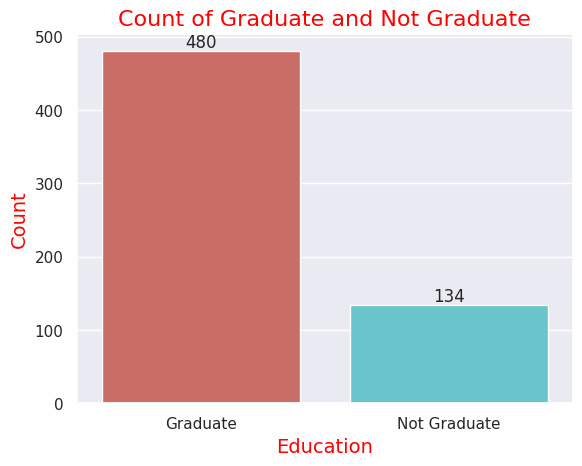

In [ ]:
# Count plot for Education using sns
ax=sns.countplot(x='Education',data=df_loan,palette="hls")
for container in ax.containers:
        ax.bar_label(container)
plt.xlabel('Education',size=14,color='red')
plt.ylabel('Count',size=14,color='red')
plt.title('Count of Graduate and Not Graduate',size=16,color='red')
plt.show()

**Observations:**The number of applicants that has been graduated is higher compared to applicants that hasn't graduated.

#### **Now work with Self_Employed**

In [ ]:
df_loan.Self_Employed.value_counts()

No     532
Yes     82
Name: Self_Employed, dtype: int64

<ipython-input-216-387668ce893a>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




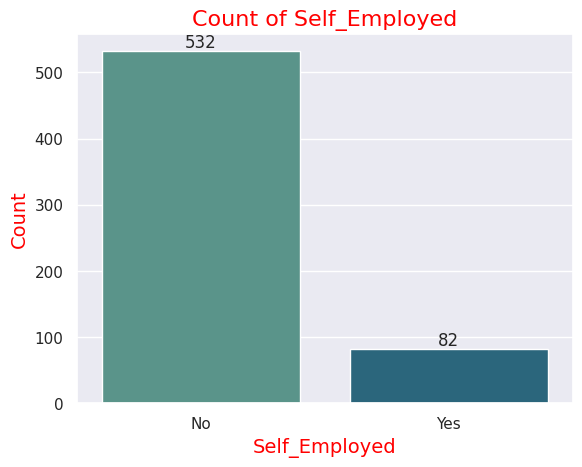

In [ ]:
# Count plot for Self_Employed using sns
ax=sns.countplot(x='Self_Employed',data=df_loan,palette="crest")
for container in ax.containers:
        ax.bar_label(container)
plt.xlabel('Self_Employed',size=14,color='red')
plt.ylabel('Count',size=14,color='red')
plt.title('Count of Self_Employed',size=16,color='red')
plt.show()

**Observations:** The number of applicants that are not self employed is higher compared to applicants that are self employed.

In [ ]:
# Drawn a funnel graph for Self_Employed
fig = px.funnel(df_loan, x=df_loan.Self_Employed.value_counts(), y=list(df_loan.Self_Employed.value_counts().index))
fig.show()

#### **Now work with ApplicantIncome**

In [ ]:
df_loan.ApplicantIncome.value_counts()

2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: ApplicantIncome, Length: 505, dtype: int64

<ipython-input-219-c1fa9ce2b64e>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




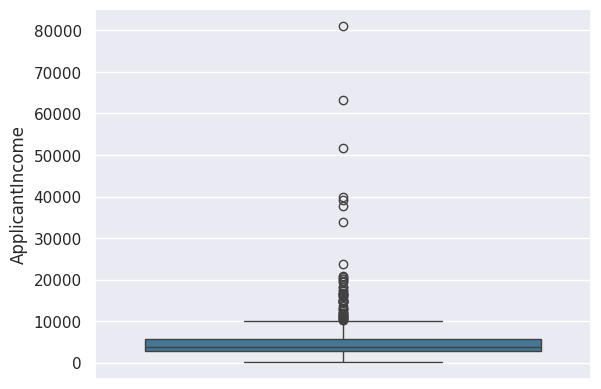

In [ ]:
# Drawn a box plot for ApplicantIncome
sns.boxplot(y="ApplicantIncome", data=df_loan, palette="mako")
plt.show()

**Observations:**   It can be seen that there are lots of outliers in Applicant Income, and the distribution also positively skewed

<Axes: ylabel='Frequency'>

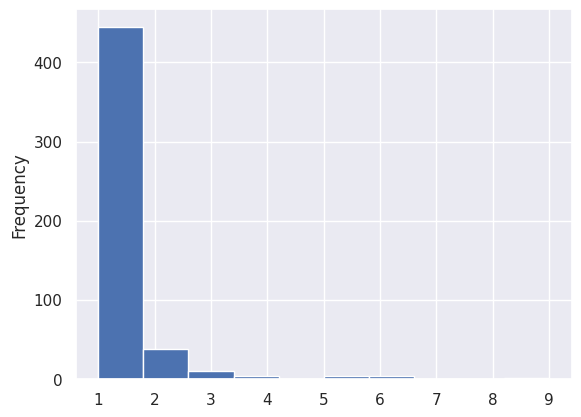

In [ ]:
df_loan.ApplicantIncome.value_counts().plot.hist()

#### **Now work with Credit_History**

In [ ]:
df_loan.Credit_History.value_counts()

1    525
0     89
Name: Credit_History, dtype: int64

<ipython-input-222-f9521e468db8>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




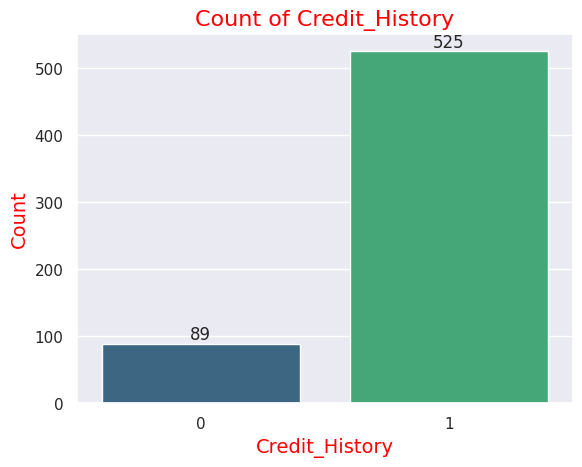

In [ ]:
# Count plot for Self_Employed using sns
ax=sns.countplot(x='Credit_History',data=df_loan,palette="viridis")
for container in ax.containers:
        ax.bar_label(container)
plt.xlabel('Credit_History',size=14,color='red')
plt.ylabel('Count',size=14,color='red')
plt.title('Count of Credit_History',size=16,color='red')
plt.show()

**Observations:**  The number of applicants that have good credit history is higher compared to applicants that have bad credit history.

#### **Now work with Property_Area**

In [ ]:
df_loan.Property_Area.value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

<ipython-input-224-f3fffad82c7a>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




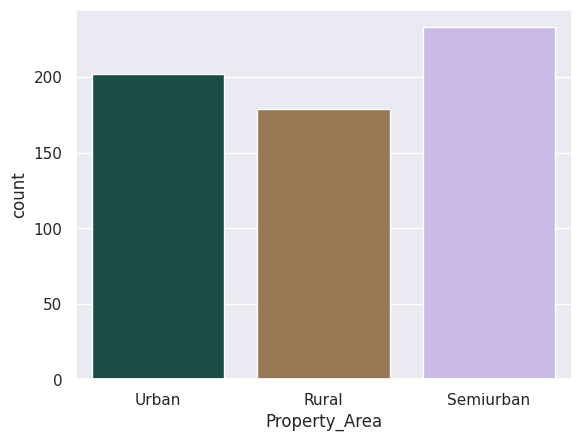

In [ ]:
# Drawn count plot for Property_Area using sns
sns.countplot(x="Property_Area", data=df_loan, palette="cubehelix")
plt.show()

**Observations:**   This column has a balanced distribution between Urban, Rural, and Semiurban property area.

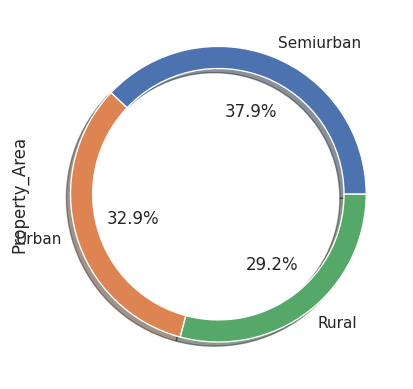

In [ ]:
# Drawn pie plot for 'Property_Area'
df_loan.Property_Area.value_counts().plot(kind='pie',autopct='%3.1f%%',shadow=True,wedgeprops=dict(width=0.15))
plt.show()

#### **Now work with Loan_Status**

In [ ]:
df_loan.Loan_Status.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [ ]:
# Drawn a funnel graph for Self_Employed
fig = px.funnel(df_loan, x=df_loan.Loan_Status.value_counts(), y=list(df_loan.Loan_Status.value_counts().index))
fig.show()

**Observations:** The number of approved loans is higher compared to rejected loans .

#### **Now work with LoanAmount**

In [ ]:
df_loan.Loan_Amount_Term.value_counts()

360.0    526
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

<ipython-input-229-d672d28c6ecc>:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




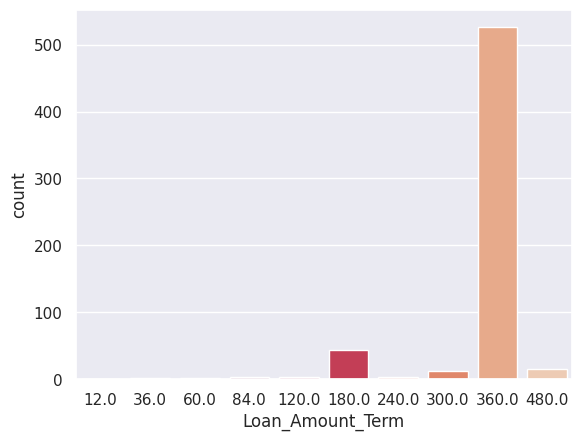

In [ ]:
sns.countplot(x="Loan_Amount_Term", data=df_loan, palette="rocket")
plt.show()

**Observations:**  As can be seen from the results, the 360 days loan duration is the most popular compared to others.

#### **Distribution of Numerical Variable**

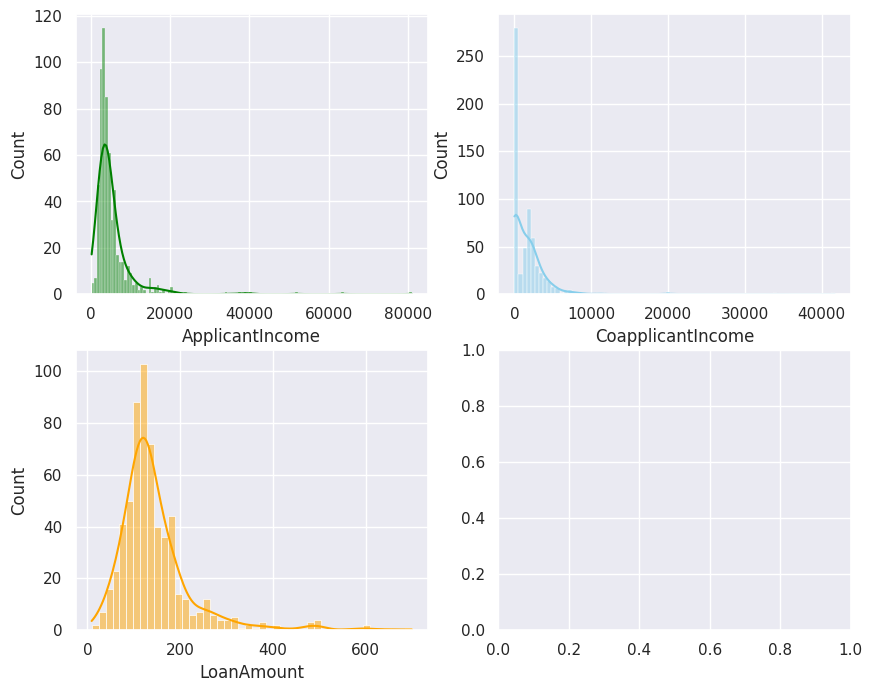

In [ ]:
# Drawn a  Histogram for numerical variables
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

sns.histplot(data=df_loan, x="ApplicantIncome", kde=True, ax=axs[0, 0], color='green')
sns.histplot(data=df_loan, x="CoapplicantIncome", kde=True, ax=axs[0, 1], color='skyblue')
sns.histplot(data=df_loan, x="LoanAmount", kde=True, ax=axs[1, 0], color='orange');

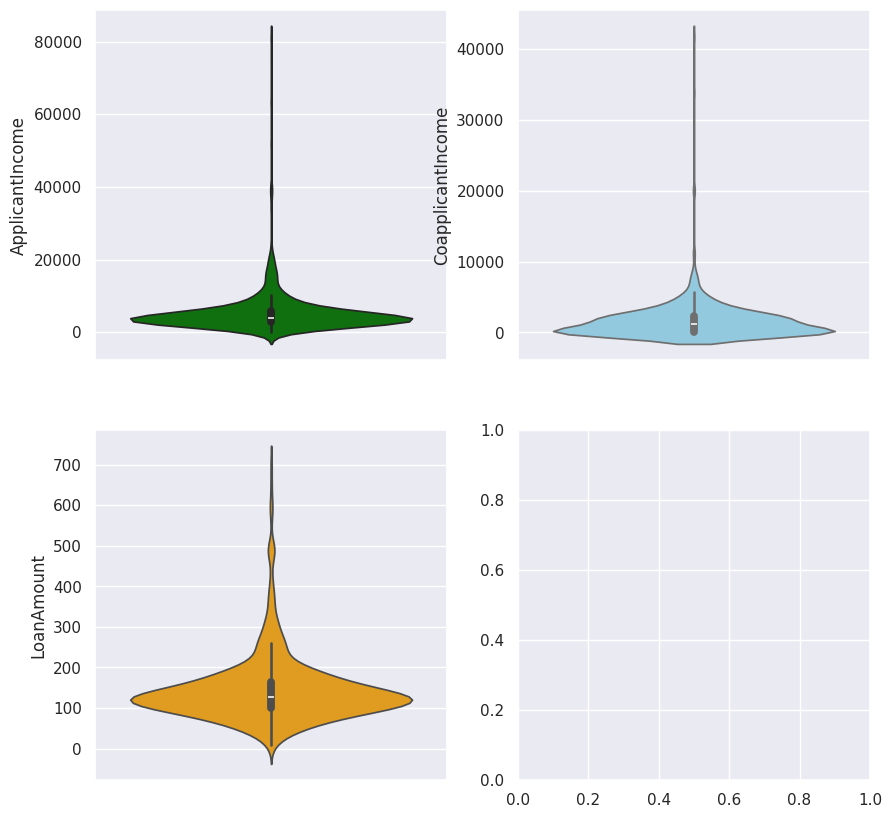

In [ ]:
# Drawn a violin plot for numerical variables
sns.set(style="darkgrid")
fig, axs1 = plt.subplots(2, 2, figsize=(10, 10))

sns.violinplot(data=df_loan, y="ApplicantIncome", ax=axs1[0, 0], color='green')
sns.violinplot(data=df_loan, y="CoapplicantIncome", ax=axs1[0, 1], color='skyblue')
sns.violinplot(data=df_loan, y="LoanAmount", ax=axs1[1, 0], color='orange');

**Observations:**  The distribution of Applicant income, Co Applicant Income, and Loan Amount are positively skewed and it has outliers (can be seen from both histogram and violin plot).
The distribution of Loan Amount Term is negativly skewed and it has outliers.

### **Bi-Variate Analysis**

#### **Gender vs Married**

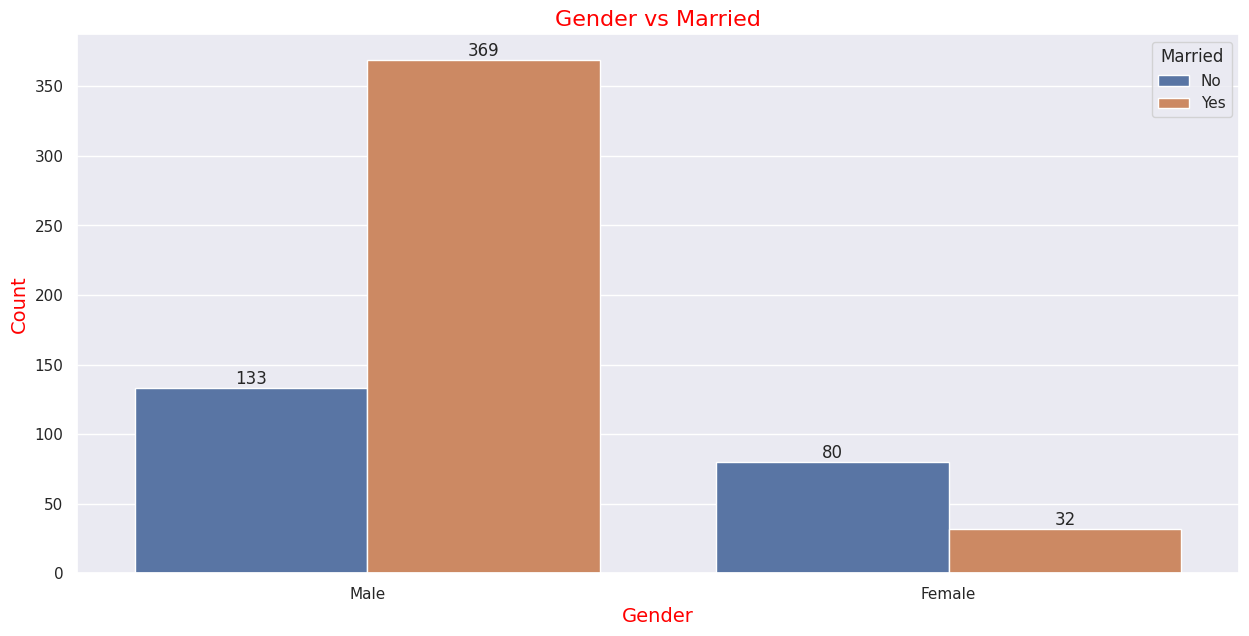

In [ ]:
figure=plt.figure(figsize=(15,7))
ax=sns.countplot(x=df_loan.Gender,hue=df_loan.Married)
for container in ax.containers:
        ax.bar_label(container)
plt.xlabel('Gender',size=14,color='red')
plt.ylabel('Count',size=14,color='red')
plt.title("Gender vs Married",color='red',size=16)
plt.show()

**Observations:**  Most male applicants are already married compared to female applicants. Also, the number of not married male applicants are higher compare to female applicants that had not married.

In [ ]:
table1 = pd.crosstab(df_loan['Gender'],df_loan['Married'])
print(table1)

Married   No  Yes
Gender           
Female    80   32
Male     133  369


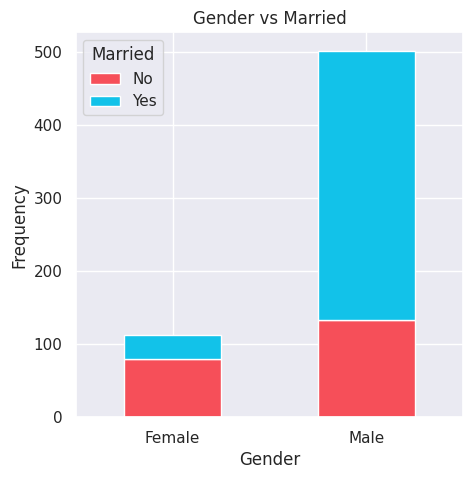

In [ ]:
# Stacked graph for Gender vs Married
pd.crosstab(df_loan['Gender'],df_loan['Married']).plot(kind="bar", stacked=True, figsize=(5,5), color=['#f64f59','#12c2e9'])
plt.title('Gender vs Married')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

#### **Self Employed vs Credit History**

In [ ]:
pd.crosstab(df_loan.Self_Employed,df_loan.Credit_History)

Credit_History,0,1
Self_Employed,,
No,77,455
Yes,12,70


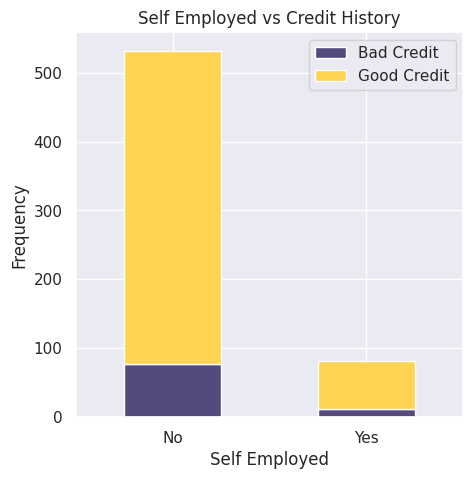

In [ ]:
pd.crosstab(df_loan.Self_Employed,df_loan.Credit_History).plot(kind="bar", stacked=True, figsize=(5,5), color=['#544a7d','#ffd452'])
plt.title('Self Employed vs Credit History')
plt.xlabel('Self Employed')
plt.ylabel('Frequency')
plt.legend(["Bad Credit", "Good Credit"])
plt.xticks(rotation=0)
plt.show()

**Observations:**  Mostly self employed applicants have good credit compared to not self employed applicants.

#### **Property Area vs Loan Status**

In [ ]:
pd.crosstab(df_loan.Property_Area,df_loan.Loan_Status)

Loan_Status,N,Y
Property_Area,,
Rural,69,110
Semiurban,54,179
Urban,69,133


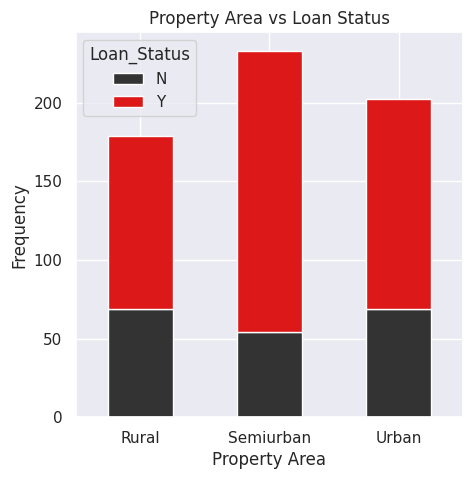

In [ ]:
pd.crosstab(df_loan.Property_Area,df_loan.Loan_Status).plot(kind="bar", stacked=True, figsize=(5,5), color=['#333333','#dd1818'])
plt.title('Property Area vs Loan Status')
plt.xlabel('Property Area')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

#### **Loan_Status vs ApplicantIncome**

<ipython-input-239-42b603382e3f>:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




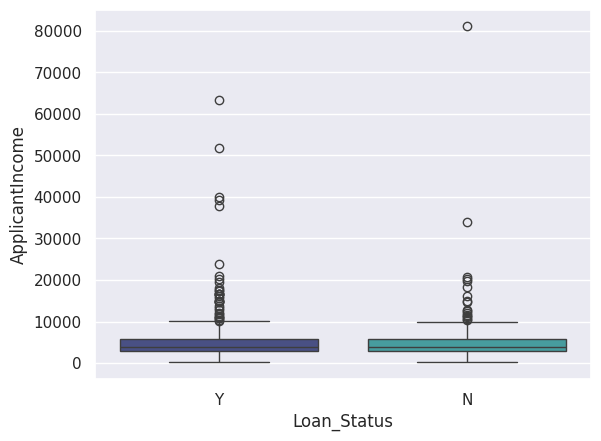

In [ ]:
sns.boxplot(x="Loan_Status", y="ApplicantIncome", data=df_loan, palette="mako")
plt.show()

**Observations:**   It can be seen that there are lots of outliers in Applicant Income, and the distribution also positively skewed

#### **CoapplicantIncome vs Loan_Status**

<ipython-input-240-709b72bde877>:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




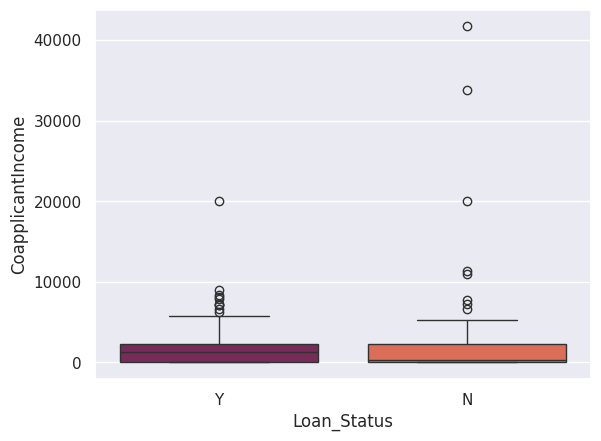

In [ ]:
sns.boxplot(y="CoapplicantIncome", x="Loan_Status", data=df_loan, palette="rocket");
plt.show()

**Observations:**   As can be seen, Co Applicant Income has a high number of outliers, and the distribution is also positively skewed.

#### **ApplicantIncome vs CoapplicantIncome**

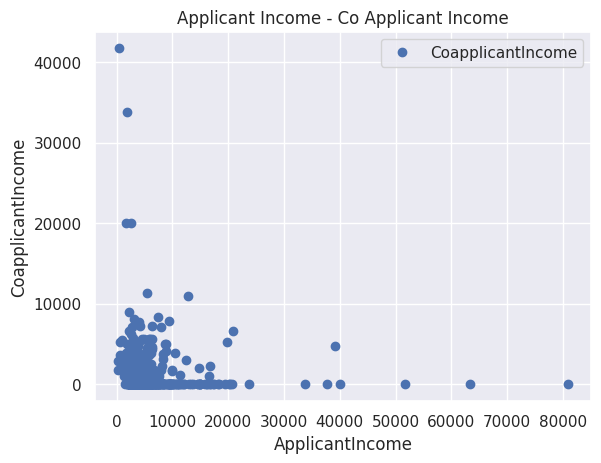

Pearson correlation: -0.11660458122889966
T Test and P value: 
 TtestResult(statistic=13.835753259915665, pvalue=1.460983948423972e-40, df=1226.0)


In [ ]:
df_loan.plot(x='ApplicantIncome', y='CoapplicantIncome', style='o')
plt.title('Applicant Income - Co Applicant Income')
plt.xlabel('ApplicantIncome')
plt.ylabel('CoapplicantIncome')
plt.show()
print('Pearson correlation:', df_loan['ApplicantIncome'].corr(df_loan['CoapplicantIncome']))
print('T Test and P value: \n', stats.ttest_ind(df_loan['ApplicantIncome'], df_loan['CoapplicantIncome']))

**Observations:**
- There is negative correlation between Applicant income and Co Applicant Income.
- The correlation coefficient is significant at the 95 per cent confidence interval, as it has a p-value of 1.46

### **One-hot Encoding**

 In this section, I will transform categorical variables into a form that could be provided by ML algorithms to do a better prediction.

In [ ]:
df_loan=pd.get_dummies(df_loan)

In [ ]:
df_loan.columns

Index(['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender_Female', 'Gender_Male',
       'Married_No', 'Married_Yes', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban', 'Property_Area_Urban',
       'Loan_Status_N', 'Loan_Status_Y'],
      dtype='object')

In [ ]:
# Drop the unnecessary columns
df_loan = df_loan.drop(['Gender_Female', 'Married_No', 'Education_Not Graduate',
              'Self_Employed_No', 'Loan_Status_N'], axis = 1)

In [ ]:
# Renaming the columns
new = {'Gender_Male': 'Gender', 'Married_Yes': 'Married',
       'Education_Graduate': 'Education', 'Self_Employed_Yes': 'Self_Employed',
       'Loan_Status_Y': 'Loan_Status'}
df_loan.rename(columns=new, inplace=True)

In [ ]:
df_loan.columns

Index(['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender', 'Married', 'Education',
       'Self_Employed', 'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban', 'Loan_Status'],
      dtype='object')

#### **Remove Outliers & Infinite values**

Since there are outliers, the outliers will be removed.

In [ ]:
Q1 = df_loan.quantile(0.25)
Q3 = df_loan.quantile(0.75)
IQR = Q3 - Q1

df_loan = df_loan[~((df_loan < (Q1 - 1.5 * IQR)) |(df_loan > (Q3 + 1.5 * IQR))).any(axis=1)]

#### **Skewed Distribution Treatment**

 - In previous section, it already shown that distribution for ApplicantIncome, CoapplicantIncome, and LoanAmount is positively skewed.
 - I will use square root transformation to normalized the distribution.

In [ ]:
# Square Root Transformation

df_loan.ApplicantIncome = np.sqrt(df_loan.ApplicantIncome)
df_loan.CoapplicantIncome = np.sqrt(df_loan.CoapplicantIncome)
df_loan.LoanAmount = np.sqrt(df_loan.LoanAmount)

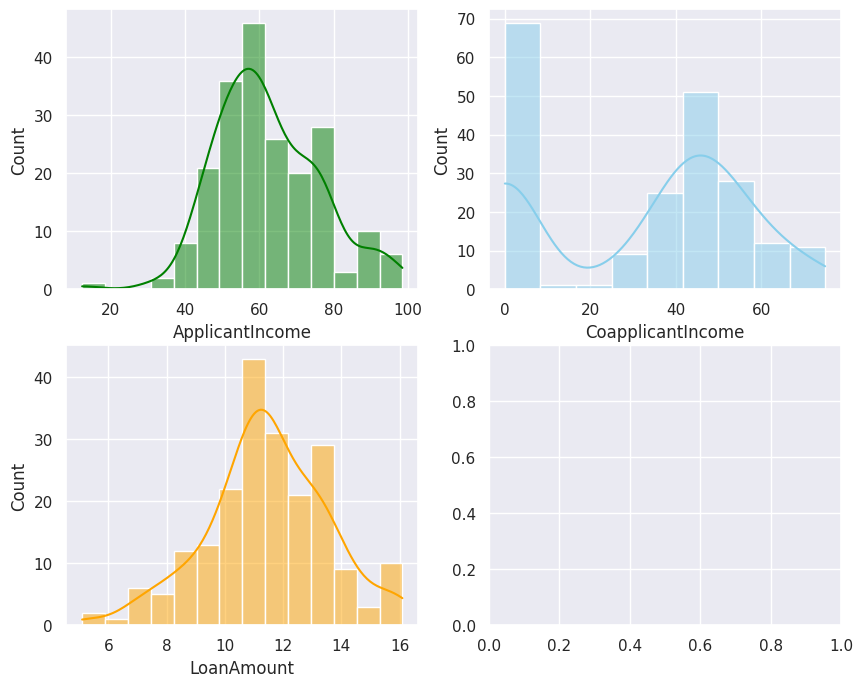

In [ ]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

sns.histplot(data=df_loan, x="ApplicantIncome", kde=True, ax=axs[0, 0], color='green')
sns.histplot(data=df_loan, x="CoapplicantIncome", kde=True, ax=axs[0, 1], color='skyblue')
sns.histplot(data=df_loan, x="LoanAmount", kde=True, ax=axs[1, 0], color='orange');

#### **Features Separating**

In [ ]:
x = df_loan.drop(["Loan_Status"], axis=1)
y = df_loan["Loan_Status"]

#### **Splitting Data Set**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [ ]:
print('Training Data Shape:',x_train.shape,y_train.shape)
print("Testing Data Shape: ",x_test.shape,y_test.shape)

Training Data Shape: (165, 13) (165,)
Testing Data Shape:  (42, 13) (42,)


### **Model Developmeent and Evaluation**

#### **1) Logistic Regression - Baseline Model**

In [ ]:
logreg=LogisticRegression()
logreg.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_pred_train=logreg.predict(x_train)   #predicting on train data
y_pred_test=logreg.predict(x_test)     #predicting on test data

In [ ]:
y_pred_train

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=uint8)

In [ ]:
y_train

275    1
570    1
10     1
187    1
371    1
      ..
167    1
566    1
304    1
120    1
484    1
Name: Loan_Status, Length: 165, dtype: uint8

In [ ]:
y_pred_test

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=uint8)

In [ ]:
y_test

31     0
209    0
89     1
11     1
456    1
217    1
303    1
330    1
230    1
357    0
117    1
434    1
132    1
552    1
246    1
223    1
562    1
97     1
165    1
43     1
474    1
40     0
15     1
141    1
235    1
437    1
336    1
332    1
428    1
530    1
193    1
524    0
379    1
176    1
545    1
395    1
512    1
314    0
41     1
368    1
411    1
55     1
Name: Loan_Status, dtype: uint8

##### **Find the Accuracy:**

In [ ]:
def model_eval(actual,predicted):
  cm = confusion_matrix(actual, predicted)
  acc_score = accuracy_score(actual,predicted)
  clas_rep = classification_report(actual,predicted)
  print('The Accuracy of the model is :', acc_score)
  print(cm)
  print(clas_rep)

In [ ]:
model_eval(y_train,y_pred_train)

The Accuracy of the model is : 0.8242424242424242
[[  0  29]
 [  0 136]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        29
           1       0.82      1.00      0.90       136

    accuracy                           0.82       165
   macro avg       0.41      0.50      0.45       165
weighted avg       0.68      0.82      0.74       165



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
model_eval(y_test,y_pred_test)

The Accuracy of the model is : 0.8571428571428571
[[ 0  6]
 [ 0 36]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.86      1.00      0.92        36

    accuracy                           0.86        42
   macro avg       0.43      0.50      0.46        42
weighted avg       0.73      0.86      0.79        42



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



#### **2) Decision Tree**

##### **Default criterion = 'Gini'**

In [ ]:
clf=DecisionTreeClassifier(random_state=0)    # default  criterion= 'gini'
clf.fit(x_train,y_train)
y_pred_train=clf.predict(x_train)
y_pred_test=clf.predict(x_test)

In [ ]:
y_pred_train

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1], dtype=uint8)

In [ ]:
y_train

275    1
570    1
10     1
187    1
371    1
      ..
167    1
566    1
304    1
120    1
484    1
Name: Loan_Status, Length: 165, dtype: uint8

In [ ]:
y_pred_test

array([1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=uint8)

In [ ]:
y_test

31     0
209    0
89     1
11     1
456    1
217    1
303    1
330    1
230    1
357    0
117    1
434    1
132    1
552    1
246    1
223    1
562    1
97     1
165    1
43     1
474    1
40     0
15     1
141    1
235    1
437    1
336    1
332    1
428    1
530    1
193    1
524    0
379    1
176    1
545    1
395    1
512    1
314    0
41     1
368    1
411    1
55     1
Name: Loan_Status, dtype: uint8

In [ ]:
model_eval(y_train,y_pred_train)

The Accuracy of the model is : 1.0
[[ 29   0]
 [  0 136]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00       136

    accuracy                           1.00       165
   macro avg       1.00      1.00      1.00       165
weighted avg       1.00      1.00      1.00       165



In [ ]:
model_eval(y_test,y_pred_test)

The Accuracy of the model is : 0.6904761904761905
[[ 2  4]
 [ 9 27]]
              precision    recall  f1-score   support

           0       0.18      0.33      0.24         6
           1       0.87      0.75      0.81        36

    accuracy                           0.69        42
   macro avg       0.53      0.54      0.52        42
weighted avg       0.77      0.69      0.72        42



In [ ]:
clf.feature_importances_

array([0.04880832, 0.38688289, 0.14274629, 0.27707389, 0.        ,
       0.        , 0.        , 0.05020284, 0.        , 0.        ,
       0.        , 0.0482665 , 0.04601927])

In [ ]:
clf.feature_names_in_

array(['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender', 'Married',
       'Education', 'Self_Employed', 'Property_Area_Rural',
       'Property_Area_Semiurban', 'Property_Area_Urban'], dtype=object)

##### **Default criterion = 'log_loss'**

In [ ]:
clf = DecisionTreeClassifier(criterion='log_loss',splitter='best',max_depth =5, min_samples_split=10,random_state=0)
clf.fit(x_train,y_train)
y_train_pred = clf.predict(x_train)
y_test_pred = clf.predict(x_test)

In [ ]:
model_eval(y_train,y_pred_train)

The Accuracy of the model is : 1.0
[[ 29   0]
 [  0 136]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00       136

    accuracy                           1.00       165
   macro avg       1.00      1.00      1.00       165
weighted avg       1.00      1.00      1.00       165



In [ ]:
model_eval(y_test,y_pred_test)

The Accuracy of the model is : 0.6904761904761905
[[ 2  4]
 [ 9 27]]
              precision    recall  f1-score   support

           0       0.18      0.33      0.24         6
           1       0.87      0.75      0.81        36

    accuracy                           0.69        42
   macro avg       0.53      0.54      0.52        42
weighted avg       0.77      0.69      0.72        42



##### **Default criterion = 'log_loss'**

In [ ]:
clf = DecisionTreeClassifier(criterion='entropy',splitter='random',max_depth =4, min_samples_split=5,random_state=0)
clf.fit(x_train,y_train)
y_train_pred = clf.predict(x_train)
y_test_pred = clf.predict(x_test)

In [ ]:
model_eval(y_train,y_pred_train)

The Accuracy of the model is : 1.0
[[ 29   0]
 [  0 136]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00       136

    accuracy                           1.00       165
   macro avg       1.00      1.00      1.00       165
weighted avg       1.00      1.00      1.00       165



In [ ]:
model_eval(y_test,y_pred_test)

The Accuracy of the model is : 0.6904761904761905
[[ 2  4]
 [ 9 27]]
              precision    recall  f1-score   support

           0       0.18      0.33      0.24         6
           1       0.87      0.75      0.81        36

    accuracy                           0.69        42
   macro avg       0.53      0.54      0.52        42
weighted avg       0.77      0.69      0.72        42



#### **3) Random Forest**

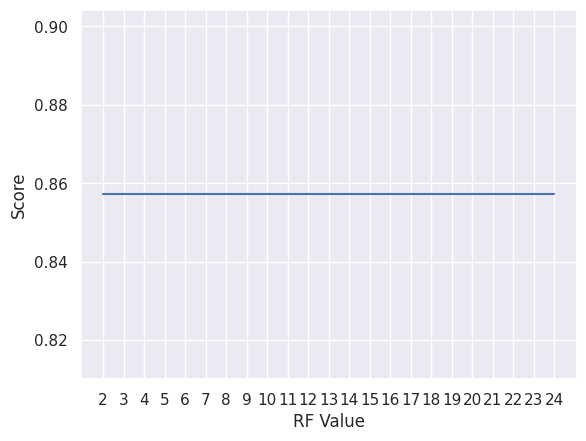

Random Forest Accuracy:  85.71%


In [ ]:
scoreListRF = []
for i in range(2,25):
    RFclassifier = RandomForestClassifier(n_estimators = 1000, random_state = 1, max_leaf_nodes=i)
    RFclassifier.fit(x_train, y_train)
    scoreListRF.append(RFclassifier.score(x_test, y_test))

plt.plot(range(2,25), scoreListRF)
plt.xticks(np.arange(2,25,1))
plt.xlabel("RF Value")
plt.ylabel("Score")
plt.show()
RFAcc = max(scoreListRF)
print("Random Forest Accuracy:  {:.2f}%".format(RFAcc*100))

####**4) Naive Bayes**

##### **Gaussian Naive Bayes**

In [ ]:
NBclassifier2 = GaussianNB()
NBclassifier2.fit(x_train, y_train)

y_pred = NBclassifier2.predict(x_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
NBAcc2 = accuracy_score(y_pred,y_test)
print('Gaussian Naive Bayes accuracy: {:.2f}%'.format(NBAcc2*100))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.85      0.97      0.91        36

    accuracy                           0.83        42
   macro avg       0.43      0.49      0.45        42
weighted avg       0.73      0.83      0.78        42

[[ 0  6]
 [ 1 35]]
Gaussian Naive Bayes accuracy: 83.33%
